# Predicting Car Prices
In this project I will predict a car's market price using its attributes. The data set I will be working with contains information on various cars. For each car I have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

## Introduction to the Data Set

In [2]:
headers = ["symboling", "normalized_losses", "make", "fuel_type",
          'aspiration','num_doors','body_style','drive_wheels',
          'engine_location','wheel_base','length','width','height',
          'curb_weight','engine_type','num_cylinders',
          'engine_size','fuel_system','bore','stroke',
          'compression_ratio',
          'horsepower','peak_rpm','city_mpg','highway_mpg','price']


In [3]:
import pandas as pd
cars = pd.read_csv('imports-85.data',names=headers)
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

## Data Cleaning
There usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview, I can tell that the `normalized-losses` column contains missing values represented using `"?"`. I will replace these values and look for the presence of missing values in other numeric columns. 

I will also rescale the values in the numeric columns so they all range from `0` to `1`.

In [5]:
import numpy as np
cars.replace('?',np.nan, inplace=True)

In [6]:
cars.drop('normalized_losses',axis=1,inplace=True)

In [7]:
num_columns = ['symboling','wheel_base',
  'length','width','height','curb_weight','engine_size',
  'bore','stroke','compression_ratio','horsepower','peak_rpm',
  'city_mpg','highway_mpg','price']

In [8]:
cars[num_columns] = cars[num_columns].astype(float)

In [9]:
cars.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [10]:
cars['num_doors'].fillna('two',inplace=True)
cars['bore'].fillna(cars['bore'].mean(),inplace=True)
cars['stroke'].fillna(cars['stroke'].mean(),inplace=True)
cars.dropna(subset=['price','horsepower','peak_rpm'],inplace=True)
cars.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [11]:
num_columns.remove('price')
cars[num_columns]=(cars[num_columns]-cars[num_columns].mean())/cars[num_columns].std()

## Univariate Model

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_name,test_name,df):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    num = int(len(df)/2)
    train = df.iloc[:num,]
    test = df.iloc[num:,]
    
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train[train_name],train[test_name])
    predicted = knn.predict(test[train_name])
    mse = mean_squared_error(test[test_name],predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [52]:
num_column_dict = {}
for column in num_columns:
    num_column_dict[column] = knn_train_test([column],'price',cars)
    
num_column_dict_v = pd.Series(num_column_dict)
num_column_dict_v = num_column_dict_v.sort_values()

In [41]:
def mod_knn_train_test(train_name,test_name,df,k):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    num = int(len(df)/2)
    train = df.iloc[:num,]
    test = df.iloc[num:,]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[train_name],train[test_name])
    predicted = knn.predict(test[train_name])
    mse = mean_squared_error(test[test_name],predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [42]:
cars_uni_dict={}
for column in num_columns:
    cars_uni_dict[column]=[]
    for i in (1,3,5,7,9):
       cars_uni_dict[column].append(mod_knn_train_test([column],'price',cars,i))
    
cars_uni_dict

{'bore': [10855.997766212004,
  8045.945694088559,
  7075.657154243697,
  6874.883086382529,
  6755.933553286308],
 'city_mpg': [5874.546739962157,
  5028.825813359527,
  4789.205292655557,
  4831.372245067458,
  4743.46733557887],
 'compression_ratio': [9001.77967126501,
  6318.135425371423,
  6382.301334847799,
  6490.17471803435,
  6701.87911623613],
 'curb_weight': [5287.694056959045,
  5083.531213634868,
  4499.059648993331,
  4408.023710374581,
  4688.299013830754],
 'engine_size': [3681.6973490497558,
  2967.804484238587,
  3095.5078204391602,
  3448.58546828128,
  3634.524859533623],
 'height': [9617.192068894123,
  8410.412453751731,
  8106.194198710021,
  7582.445446112046,
  7863.639177047108],
 'highway_mpg': [5411.357818514684,
  4400.075490514023,
  4537.452840526278,
  4493.438789059044,
  4790.543868000226],
 'horsepower': [4433.762825185849,
  3931.370995664942,
  4018.521481938351,
  4512.396146987422,
  4673.486348475056],
 'length': [5218.287991286031,
  5261.475911

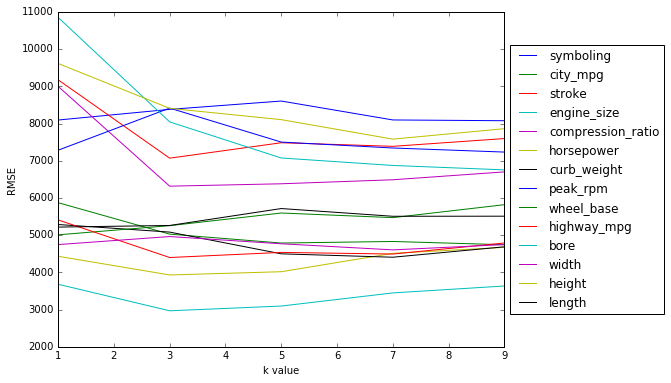

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))

for key,value in cars_uni_dict.items():
    x = (1,3,5,7,9)
    y = list(value)
    
    plt.plot(x,y,label = key)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Multivariate Model

In [44]:
def multi_knn_train_test(train_name,test_name,df):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    num = int(len(df)/2)
    train = df.iloc[:num,]
    test = df.iloc[num:,]
    
    knn = KNeighborsRegressor()
    knn.fit(train[train_name],train[test_name])
    predicted = knn.predict(test[train_name])
    mse = mean_squared_error(test[test_name],predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [66]:
multi_model_dict = {}

two_features = list(num_column_dict_v.head(2).index)
multi_model_dict['two_best_features'] = multi_knn_train_test(two_features,'price',cars)

three_features = list(num_column_dict_v.head(3).index)
multi_model_dict['three_best_features'] = multi_knn_train_test(three_features,'price',cars)

four_features = list(num_column_dict_v.head(4).index)
multi_model_dict['four_best_features'] = multi_knn_train_test(four_features,'price',cars)

five_features = list(num_column_dict_v.head(5).index)
multi_model_dict['five_best_features'] = multi_knn_train_test(five_features,'price',cars)

multi_model_dict_v = pd.Series(multi_model_dict)
multi_model_dict_v = multi_model_dict_v.sort_values()
multi_model_dict_v

two_best_features      2953.564312
four_best_features     3456.214476
three_best_features    3461.155242
five_best_features     3641.648423
dtype: float64

## Hyperparameter Tuning

In [77]:
def hyper_knn_train_test(train_name,test_name,df,k):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    num = int(len(df)/2)
    train = df.iloc[:num,]
    test = df.iloc[num:,]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[train_name],train[test_name])
    predicted = knn.predict(test[train_name])
    mse = mean_squared_error(test[test_name],predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [79]:
hyper_tune = {}
hyper_tune['two_best_features'] = []
hyper_tune['three_best_features'] = []
hyper_tune['four_best_features'] = []

for i in [2,3,4]:
    for k in range(1,26):
        if i == 2:
            two_features = list(num_column_dict_v.head(2).index)
            hyper_tune['two_best_features'].append(hyper_knn_train_test(two_features,'price',cars,k))
        if i == 3:
            three_features = list(num_column_dict_v.head(3).index)
            hyper_tune['three_best_features'].append(hyper_knn_train_test(three_features,'price',cars,k))
        if i == 4:
            four_features = list(num_column_dict_v.head(4).index)
            hyper_tune['four_best_features'].append(hyper_knn_train_test(four_features,'price',cars,k) )

In [80]:
hyper_tune

{'four_best_features': [2909.507350050864,
  2667.8944488116467,
  2934.1234182176677,
  3098.9768578718044,
  3456.214475925937,
  3836.9851431675997,
  3905.719931153825,
  4124.964887539953,
  4227.704601644424,
  4288.053548884389,
  4265.059419068136,
  4275.258936172106,
  4349.211648239648,
  4376.516020955901,
  4460.168485945595,
  4479.699635207665,
  4564.569314721021,
  4582.381412163681,
  4630.75287312024,
  4692.821267246921,
  4742.314464435254,
  4752.962629140719,
  4766.828338718823,
  4810.0946825797455,
  4826.57842862954],
 'three_best_features': [2821.7129177150537,
  2941.1350853029517,
  3143.2589358463256,
  3244.998387904068,
  3461.1552423432267,
  3586.1990199699367,
  3835.3883841862767,
  3925.4259563254727,
  4062.7063904875827,
  4178.69178447035,
  4302.917072951118,
  4279.776805463497,
  4336.709081364639,
  4374.930162148131,
  4437.645609780033,
  4450.55768922471,
  4521.8368736846905,
  4532.0739667703765,
  4570.603922754417,
  4673.02054560003,

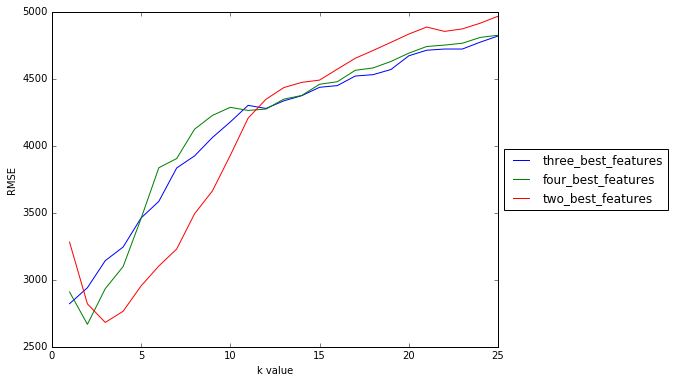

In [82]:
plt.figure(figsize=(8, 6))

for key,value in hyper_tune.items():
    x = range(1,26)
    y = list(value)
    
    plt.plot(x,y,label = key)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Conclusion

- The k value that is most optimal for the `two_best_features` model is `3`.
- The k value that is most optimal for the `three_best_features` model is `1`.
- The k value that is most optimal for the `two_best_features` model is `2`.

There is a minor difference between the `k` values for each model. The number of features included in each model probably accounts for the differences in `k` values.